## Problem 3

In [1]:
# import denpendencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import rbfnn

### Training Data Generation

441 73 368


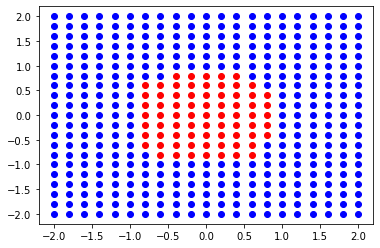

In [2]:
# generate training data
train_data = []
for i in range(21):
    for j in range(21):
        xi, xj = -2+0.2*i, -2+0.2*j
        train_data.append([xi, xj, 1 if xi**2 + xj**2 < 1 else -1])
print(len(train_data), [item[2] for item in train_data].count(1), [item[2] for item in train_data].count(-1))
# plot training data
plt.scatter([item[0] for item in train_data if item[2] == 1], [item[1] for item in train_data if item[2] == 1], color = 'red')
plt.scatter([item[0] for item in train_data if item[2] == -1], [item[1] for item in train_data if item[2] == -1], color = 'blue')
plt.show()

In [3]:
# train-test split
X = [[item[0], item[1]] for item in train_data]
Y = [item[2] for item in train_data]
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
len(X_train), len(X_val), len(y_train), len(y_val)

(352, 89, 352, 89)

In [10]:
mse_result = []
for wid in np.arange(0.05, 4.0, 0.05):
    rbf_param = [[(item[0], item[1]), wid] for item in train_data]
    net = rbfnn.Rbfnn(rbf_param=rbf_param)
    G = net.compute_G(X_train)
    net.compute_W(G, y_train)
    mse = mean_squared_error(y_val, net.predict(X_val))
    mse_result.append(mse)

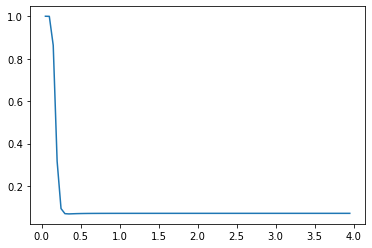

In [11]:
plt.plot(np.arange(0.05, 4.0, 0.05), mse_result)